In [2]:
import numpy as np
import matplotlib.pyplot as plt

import camb
import healpy as hp

In [18]:
n_side = 256 # più alta è la risoluzione più grande è il numero di pixel e più tempo ci mette

hp.nside2npix(n_side) # da taglia a numero pixel

786432

In [19]:
hp.nside2pixarea(n_side, degrees=True) # da n_side a area pixel

0.052455852825697924

In [20]:
hp_map = np.arange(hp.nside2npix(n_side)) # lista di numeri grande quanto la risoluzione che vogliamo

In [22]:
hp.ang2pix(n_side, theta=np.pi/2, phi=0) # da angoli a pixel

391680

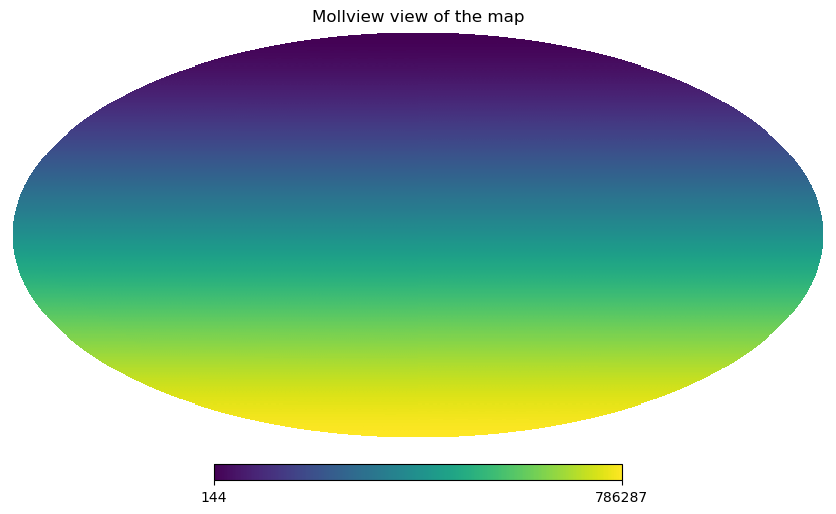

In [21]:
hp.mollview(hp_map, title='Mollview view of the map') # plot della mappa

In [23]:
Omega_b = 0.05
Omega_c = 0.25
h = 0.7
As = 2.1e-9
ns = 0.96

In [26]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=100*h, ombh2=Omega_b*h**2, omch2=Omega_c*h**2);
pars.InitPower.set_params(As=As, ns=ns);

In [27]:
result = camb.get_results(pars)

power = result.get_cmb_power_spectra(pars, CMB_unit='muK')

In [28]:
print(power.keys())

dict_keys(['total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'])


In [34]:
C_l = power['unlensed_scalar'][:,0] # power['unlensed_scalar'] shape (numero di cl, numero di spettri che ci sono dentro)

In [35]:
C_l.shape

(2401,)

In [36]:
ells = np.arange(len(C_l))

Text(0.5, 1.0, 'CMB power spectrum')

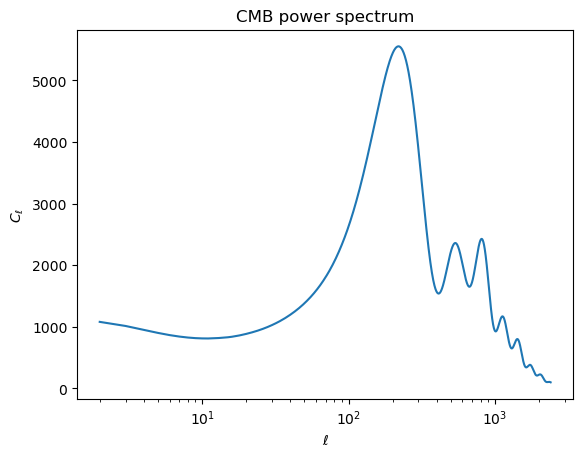

In [39]:
plt.semilogx(ells[2:], C_l[2:])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.title('CMB power spectrum')

In [43]:
power = result.get_cmb_power_spectra(pars, CMB_unit='K', raw_cl=True) # servono cl normalizzati in kelvin
C_l = power['unlensed_scalar'][:,0]

Text(0, 0.5, '$C_\\ell$')

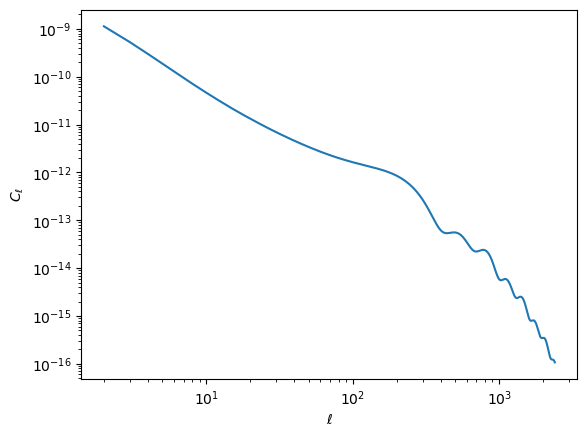

In [45]:
plt.loglog(ells[2:], C_l[2:])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')

In [46]:
alms = hp.synalm(C_l)

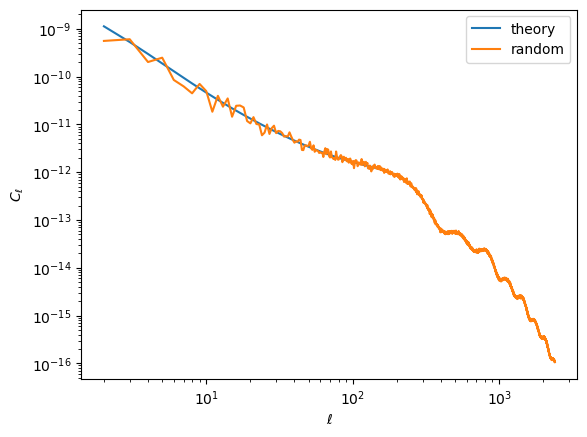

In [49]:
plt.loglog(ells[2:], C_l[2:], label="theory")
plt.loglog(ells[2:], hp.alm2cl(alms)[2:], label="random")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')
plt.legend()

In [61]:
mock_map = hp.alm2map(alms, nside=1024)

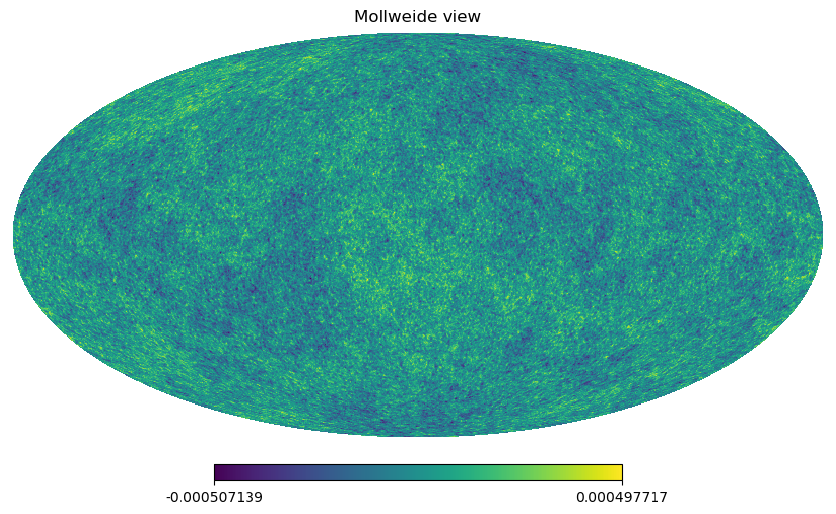

In [62]:
hp.mollview(mock_map)

In [63]:
Cl_meas = hp.anafast(mock_map, lmax=2048) # se si mette il punto interrogativo dopo la funzione ti dice come fare tipo hp.anafast?

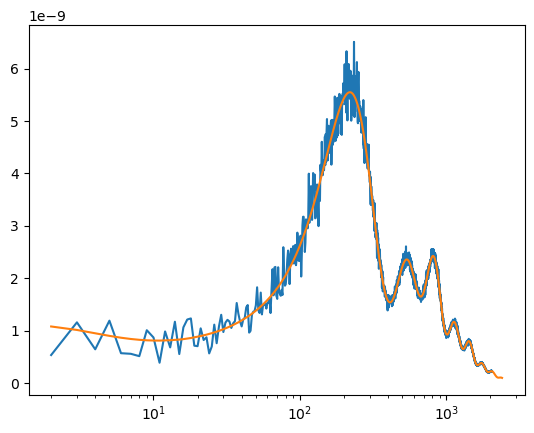

In [68]:
ell_meas = np.arange(len(Cl_meas))
plt.semilogx(ell_meas[2:], Cl_meas[2:]*ell_meas[2:]*(ell_meas[2:]+1)/(2*np.pi))
plt.plot(ells[2:], C_l[2:]*ells[2:]*(ells[2:]+1)/(2*np.pi))